# Fetching datasets

We have several templates, parcellations, and datasets integrated in `NiSpace`.  
These can be accessed through functions named `nispace.datasets.fetch_...()`. On first access, data should should be downloaded to the user's home directory into a folder called `nispace-data`. The user can however provide a custom data folder via the argument `nispace_data_dir` available for every `fetch_` method.

## Fetch reference datasets

We start with the reference datasets as these are most important for you.  
With "reference data", we refer to brain maps that are ususally used to compare a certain (set of) target map(s) to. The main reference maps are nuclear imaging maps (`pet`), mRNA expression maps from the Allen Human Brain Atlas (`mrna`), and meta-analytic maps for behavioral domains obtained from the BrainMap database (`brainmap`).
Later, we will run systematic comparisons of user-defined target maps with with these reference maps, for example to answer the question if a group-comparison map (like a SPM t-map) spatially correlates ("colocalizes") with certain neurotransmitter receptors.

We can fetch our reference data with: `nispace.datasets.fetch_reference(...)`.  
- The first and only mandatory argument determines the reference dataset (e.g., `pet` or `mrna`).  
- The second argument is used to subset the datasets; it can be a part of a name or, for the `pet` dataset, a dict with detailed sub-setting information (see below).
- The argument `parcellation` will cause the data to be returned in parcellated format as a pandas DataFrame. See below for included parcellations.  
- The argument `collection` can be a name of a map subset shipped with the toolbox. Very relevant for `pet` data, as we have many maps targeting the same transmitter receptor, and more so for `mrna` data, as we ship the toolbox with, e.g., pre-defined cell-type marker gene sets.

When fetching datasets, the function will by default print detailed information on the sources of each dataset. **The user is responsible for citing these sources when used in publications!**


In [23]:
from nispace.datasets import fetch_reference

### `dataset = pet`

Collections include:
- `"All"`: all maps
- `"AllTargetSets"`: all maps, but sorted in sets by tracer target. If called without a parcellation, this will not have an influence. If called with a parcellation, i.e. returned as a table, it will have a 3-dimensional "multi"-index, with "sets" in the first, "map" in the second, and "weight" (= number of subjects) in the third place.
- `"UniqueTracers"`: one pre-selected map for each target. When called with a parcellation, returned as table with a 2d-index, sorting the maps into sets by target groups (e.g., "Dopamine", or "Serotonin").
- `"UniqueTracerSets"`: one or more maps for each target, given they have the same tracer. If parcellation is provided, the output table is indexed as for "AllTargetSets".

In many instances, `"UniqueTracers"` will be a good choice. 

In [54]:
# Get all pet maps as paths to volumes
print("All pet maps")
pet_maps = fetch_reference("pet")
print("Number of pet maps:", len(pet_maps))
print("First map path:", pet_maps[0])

All pet maps
INFO | 11/06/24 14:45:03 | nispace: Loading pet maps.

The NiSpace "PET" dataset is based on openly available nuclear imaging maps from various independent sources.
The accompanying metadata table contains detailed information about tracers, source samples, original publications and data 
sources, as well as the publication licenses. The licenses determine in which contexts the maps can be used. Every map, 
except for those with a "free" or "CC0 1.0" license, must be cited when used. The responsibility for this lies with the user!
We additionally recommend to cite Dukart et al., 2021 (https://doi.org/10.1002/hbm.25244) and Hansen et al., 2022 
(https://doi.org/10.1038/s41593-022-01186-3), as they provided the majority of these data.
- target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliveau2017.nii.gz         Source: Beliveau2017       CC BY-NC-SA 4.0  https://doi.org/10.1523/JNEUROSCI.2830-16.2016
- target-5HT1a_tracer-way100635_n-35_dx-hc_pub-savli2012.nii.gz         Source: S

This command returned the paths to all maps and printed citation information. We can turn off the latter with the ´print_references` argument.  
This is how we get a single specific map:

In [56]:
# Get a single map based on the exact name
print("Get a single map (path to volume)")
pet_maps = fetch_reference(
    "pet", 
    maps="target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliveau2017",
    print_references=False
)
print("Loaded map path:", pet_maps)

Get a single map (path to volume)
INFO | 11/06/24 14:47:04 | nispace: Loading pet maps.
INFO | 11/06/24 14:47:04 | nispace: Applying filter: target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliveau2017
INFO | 11/06/24 14:47:04 | nispace: Filtered from 46 to 1 maps.
Loaded map path: [PosixPath('/Users/llotter/nispace-data/reference/pet/map/target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliveau2017.nii.gz')]


We have more options for sub-setting the `pet` collection, e.g.:

In [58]:
# Subset maps based on sub-string
print("Maps containing '5HT'")
pet_maps = fetch_reference(
    "pet", 
    maps="5HT", 
    print_references=False
)
print("Number of maps:", len(pet_maps))
print()

# Subset maps based on detail dict
print("Maps containing `5HT` or 'GABA' with a sample sizes over 30")
pet_maps = fetch_reference(
    "pet", 
    maps={"target": ["5HT", "GABA"], "n":">30"},
    print_references=False
)
print("Number of maps:", len(pet_maps))


Maps containing '5HT'
INFO | 11/06/24 14:48:16 | nispace: Loading pet maps.
INFO | 11/06/24 14:48:16 | nispace: Applying filter: 5HT
INFO | 11/06/24 14:48:16 | nispace: Filtered from 46 to 12 maps.
Number of maps: 12

Maps containing `5HT` or 'GABA' with a sample sizes over 30
INFO | 11/06/24 14:48:16 | nispace: Loading pet maps.
INFO | 11/06/24 14:48:16 | nispace: Applying filter: {'target': ['5HT', 'GABA'], 'n': '>30'}
INFO | 11/06/24 14:48:16 | nispace: Filtered from 46 to 5 maps.
Number of maps: 5


If we pass a parcellation (see below for the available ones), we will get the data already parcellated as a pandas DataFrame.

In [60]:
# Get all pet maps as table
print("All pet maps as table")
pet_tab = fetch_reference(
    "pet", 
    parcellation="Destrieux",
    print_references=False
)
print(pet_tab.shape) # pet maps x 148 parcels
display(pet_tab.head(5))

All pet maps as table
INFO | 11/06/24 14:49:37 | nispace: Loading pet maps.
INFO | 11/06/24 14:49:37 | nispace: Loading parcellated data: Destrieux
INFO | 11/06/24 14:49:37 | nispace: Standardizing parcellated data.
(46, 148)


,1_LH_CX_G_and_S_frontomargin,2_LH_CX_G_and_S_occipital_inf,3_LH_CX_G_and_S_paracentral,4_LH_CX_G_and_S_subcentral,5_LH_CX_G_and_S_transv_frontopol,6_LH_CX_G_and_S_cingul-Ant,7_LH_CX_G_and_S_cingul-Mid-Ant,8_LH_CX_G_and_S_cingul-Mid-Post,9_LH_CX_G_cingul-Post-dorsal,10_LH_CX_G_cingul-Post-ventral,...,139_RH_CX_S_parieto_occipital,140_RH_CX_S_pericallosal,141_RH_CX_S_postcentral,142_RH_CX_S_precentral-inf-part,143_RH_CX_S_precentral-sup-part,144_RH_CX_S_suborbital,145_RH_CX_S_subparietal,146_RH_CX_S_temporal_inf,147_RH_CX_S_temporal_sup,148_RH_CX_S_temporal_transverse
map,,,,,,,,,,,,,,,,,,,,,
target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliveau2017,0.152298,-0.867215,-0.910704,0.629737,0.593060,0.521233,0.041711,-0.385884,-1.157466,-0.874524,...,-0.630352,-1.789222,-1.015344,-0.159337,-0.714424,0.744234,-0.065963,0.004635,0.087736,0.440559
target-5HT1a_tracer-way100635_n-35_dx-hc_pub-savli2012,0.341783,-0.474821,-1.315982,0.266376,0.489235,0.489613,-0.160446,-0.340921,-0.059847,-1.528099,...,-1.090453,-1.868328,-0.609461,-0.511881,-0.758026,0.998004,-0.348006,1.391079,0.483772,0.225673
target-5HT1b_tracer-az10419369_n-36_dx-hc_pub-beliveau2017,0.353887,-0.241365,-0.289608,0.665999,1.011892,0.244795,0.594562,-0.548424,-1.422878,-2.275358,...,0.525105,-2.331555,-1.407758,0.539547,0.090825,0.116932,0.247801,-1.068246,-0.621631,1.979262
target-5HT1b_tracer-p943_n-23_dx-hc_pub-savli2012,1.098682,0.115349,-0.547173,0.546040,0.970646,0.553744,0.677049,0.147930,0.366077,-2.513121,...,-0.575896,-1.930829,-0.226043,0.451536,-0.210029,0.661378,-0.066525,-0.524057,-0.281516,1.080330
target-5HT1b_tracer-p943_n-65_dx-hc_pub-gallezot2010,1.099557,-0.031472,-0.922484,0.679954,0.499929,0.819815,0.617235,-0.112846,-0.554890,-3.692527,...,-0.806732,-2.484732,-0.179660,1.036585,0.438154,0.790821,-0.226112,0.074696,-0.151976,0.781770


"Collections" provide pre-defined subsets of a dataset. In part, they provide multi-indices to group maps into sets. This is mandatory for X-set enrichment analyses (see later notebooks). 
If a collection is requested without a parcellation, a list of unique maps in the collection will be returned.

In [66]:
# Filter using pre-defined collection
print("Filter using pre-defined collection")
pet_tab = fetch_reference(
    "pet", 
    collection="UniqueTracers", 
    parcellation="HCPex",
    print_references=False
)
print(pet_tab.shape) # pet maps x 148 parcels
display(pet_tab)



Filter using pre-defined collection
INFO | 11/06/24 14:52:10 | nispace: Loading pet maps.
INFO | 11/06/24 14:52:10 | nispace: Applying collection filter from: /Users/llotter/nispace-data/reference/pet/collection-UniqueTracers.json.
INFO | 11/06/24 14:52:10 | nispace: Loading parcellated data: HCPex
INFO | 11/06/24 14:52:10 | nispace: Standardizing parcellated data.
(26, 426)


1_LH_CX_V1   
set                     map                                                              
General                 target-CBF_tracer-asl_n-31_dx-hc_pub-holiga2018      -0.180978  \
                        target-SV2A_tracer-ucbj_n-10_dx-hc_pub-finnema2016   -0.135596   
                        target-HDAC_tracer-martinostat_n-8_dx-hc_pub-we...    1.089175   
Immunity                target-TSPO_tracer-pbr28_n-6_dx-hc_pub-lois2018      -0.393586   
                        target-COX1_tracer-ps13_n-11_dx-hc_pub-kim2020        2.483282   
Glutamate               target-mGluR5_tracer-abp688_n-73_dx-hc_pub-smar...   -0.556717   
                        target-NMDA_tracer-ge179_n-29_dx-hc_pub-galovic...   -0.017909   
GABA                    target-GABAa5_tracer-ro154513_n-10_dx-hc_pub-lu...   -0.656868   
                        target-GABAa_tracer-flumazenil_n-16_dx-hc_pub-n...    1.251899   
Dopamine                target-FDOPA_tracer-fluorodopa_n-12_dx-hc_pub-g...   -0.403944   
                        target-D1_tracer-sch23390_n-13_dx-hc_pub-kaller...   -0.193208   
                        target-D2_tracer-flb457_n-55_dx-hc_pub-sandiego...   -0.810992   
                        target-DAT_tracer-fpcit_n-174_dx-hc_pub-dukart2018   -0.248632   
Serotonin               target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliv...   -1.486284   
                        target-5HT1b_tracer-p943_n-65_dx-hc_pub-gallezo...    1.416881   
                        target-5HT2a_tracer-cimbi36_n-29_dx-hc_pub-beli...    0.397625   
                        target-5HT4_tracer-sb207145_n-59_dx-hc_pub-beli...   -1.236422   
                        target-5HT6_tracer-gsk215083_n-30_dx-hc_pub-rad...    0.124932   
                        target-5HTT_tracer-dasb_n-100_dx-hc_pub-belivea...   -0.206080   
Noradrenaline           target-NET_tracer-mrb_n-77_dx-hc_pub-ding2010        -0.449530   
Actylcholine            target-A4B2_tracer-flubatine_n-30_dx-hc_pub-hil...   -0.768162   
                        target-M1_tracer-lsn3172176_n-24_dx-hc_pub-naga...    0.417445   
                        target-VAChT_tracer-feobv_n-18_dx-hc_pub-aghour...   -0.696991   
Opiods/Endocannabinoids target-MU_tracer-carfentanil_n-204_dx-hc_pub-ka...   -1.809027   
                        target-CB1_tracer-omar_n-77_dx-hc_pub-normandin...   -1.326908   
Histamine               target-H3_tracer-gsk189254_n-8_dx-hc_pub-gallez...   -0.650455   

                                                                            2_LH_CX_V2   
set                     map                                                              
General                 target-CBF_tracer-asl_n-31_dx-hc_pub-holiga2018      -0.229727  \
                        target-SV2A_tracer-ucbj_n-10_dx-hc_pub-finnema2016   -0.117723   
                        target-HDAC_tracer-martinostat_n-8_dx-hc_pub-we...    0.946498   
Immunity                target-TSPO_tracer-pbr28_n-6_dx-hc_pub-lois2018      -0.543195   
                        target-COX1_tracer-ps13_n-11_dx-hc_pub-kim2020        1.737391   
Glutamate               target-mGluR5_tracer-abp688_n-73_dx-hc_pub-smar...   -0.506852   
                        target-NMDA_tracer-ge179_n-29_dx-hc_pub-galovic...   -0.191309   
GABA                    target-GABAa5_tracer-ro154513_n-10_dx-hc_pub-lu...   -0.594001   
                        target-GABAa_tracer-flumazenil_n-16_dx-hc_pub-n...    0.909320   
Dopamine                target-FDOPA_tracer-fluorodopa_n-12_dx-hc_pub-g...   -0.369594   
                        target-D1_tracer-sch23390_n-13_dx-hc_pub-kaller...   -0.221840   
                        target-D2_tracer-flb457_n-55_dx-hc_pub-sandiego...   -0.740258   
                        target-DAT_tracer-fpcit_n-174_dx-hc_pub-dukart2018   -0.314741   
Serotonin               target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliv...   -1.048429   
                        target-5HT1b_tracer-p943_n-65_dx-hc_pub-gallezo...    0.047032   
                        t

### `mrna`

The `mrna` dataset is only available in tabulated format, so you always have to pass a `parcellation`.

Collections:
- `"CellTypesPsychEncodeTPM"`: cell type marker sets from Lake 2016 or Darmanis 2015
- `"CellTypesPsychEncodeUMI"`: cell type marker sets from Lake Lake 2018
- `"SynGO"`: Synapse-function related gene sets from the SynGO database

In [71]:
# Get all genes for a given parcellation
mrna_tab = fetch_reference(
    "mrna", 
    parcellation="Destrieux",
)
display(f"{mrna_tab.shape[0]} genes x {mrna_tab.shape[1]} parcels", mrna_tab.head(5))

INFO | 11/06/24 14:55:52 | nispace: Loading mrna maps.
INFO | 11/06/24 14:55:53 | nispace: Loading parcellated data: Destrieux
INFO | 11/06/24 14:55:53 | nispace: Standardizing parcellated data.

The NiSpace "mRNA" dataset is based on Allen Human Brain Atlas (AHBA) gene expression data published in Hawrylycz et al., 2015
(https://doi.org/10.1038/nn.4171). The AHBA dataset consists of mRNA expression data from postmortem brain tissue of 6 donors, 
mapped into imaging space using the abagen toolbox (Markello et al., 2021, https://doi.org/10.7554/eLife.72129).
In addition to those two publications, please cite publications associated with gene set collections as appropriate.




'15633 genes x 148 parcels'

,1_LH_CX_G_and_S_frontomargin,2_LH_CX_G_and_S_occipital_inf,3_LH_CX_G_and_S_paracentral,4_LH_CX_G_and_S_subcentral,5_LH_CX_G_and_S_transv_frontopol,6_LH_CX_G_and_S_cingul-Ant,7_LH_CX_G_and_S_cingul-Mid-Ant,8_LH_CX_G_and_S_cingul-Mid-Post,9_LH_CX_G_cingul-Post-dorsal,10_LH_CX_G_cingul-Post-ventral,...,139_RH_CX_S_parieto_occipital,140_RH_CX_S_pericallosal,141_RH_CX_S_postcentral,142_RH_CX_S_precentral-inf-part,143_RH_CX_S_precentral-sup-part,144_RH_CX_S_suborbital,145_RH_CX_S_subparietal,146_RH_CX_S_temporal_inf,147_RH_CX_S_temporal_sup,148_RH_CX_S_temporal_transverse
map,,,,,,,,,,,,,,,,,,,,,
A1BG,0.915104,-0.833886,-1.429474,-0.229614,-1.264924,0.473820,0.114130,-0.352383,-1.400679,0.197000,...,-0.071765,0.191873,-1.627920,0.527742,-0.573100,0.683078,-0.146038,0.571981,0.518902,2.374083
A1BG-AS1,-0.276505,-0.468382,-1.085363,0.296107,-0.995114,0.617704,0.337769,0.109437,1.119759,-2.129280,...,-1.353809,-0.887764,-0.756467,-0.345989,-0.443215,0.872070,0.064986,0.780811,0.599911,0.623754
A2M,-1.029645,0.473496,-0.328709,-0.407993,-1.652113,0.513345,-0.573481,0.475800,-0.169552,2.149428,...,2.675755,0.602389,0.696441,1.301808,0.290385,0.912049,0.793383,-0.890735,-0.068918,2.282098
A2ML1,0.379052,-0.808832,1.976254,1.216162,0.067731,-0.762473,1.198762,-0.114264,0.145398,3.951483,...,1.039137,1.749137,0.150923,-1.672689,-0.016777,-0.634966,-0.194880,0.730839,-0.529856,-2.319760
A3GALT2,0.263090,-0.875211,1.035743,-0.205034,-1.193316,-0.797545,0.699940,0.350968,-0.705385,2.182766,...,-0.776253,-0.357646,-0.592583,-0.484897,0.654761,-0.476213,-0.263694,0.133988,-0.204725,0.656476


Collections will subset and sort genes.

In [72]:
# Get all genes for a given parcellation
mrna_tab = fetch_reference(
    "mrna", 
    parcellation="Destrieux",
    collection="CellTypesPsychEncodeTPM"
)
display(f"{mrna_tab.shape[0]} genes x {mrna_tab.shape[1]} parcels", mrna_tab.head(5))

INFO | 11/06/24 14:56:31 | nispace: Loading mrna maps.
INFO | 11/06/24 14:56:31 | nispace: Applying collection filter from: /Users/llotter/nispace-data/reference/mrna/collection-CellTypesPsychEncodeTPM.json.
INFO | 11/06/24 14:56:32 | nispace: Loading parcellated data: Destrieux
INFO | 11/06/24 14:56:32 | nispace: Standardizing parcellated data.

The NiSpace "mRNA" dataset is based on Allen Human Brain Atlas (AHBA) gene expression data published in Hawrylycz et al., 2015
(https://doi.org/10.1038/nn.4171). The AHBA dataset consists of mRNA expression data from postmortem brain tissue of 6 donors, 
mapped into imaging space using the abagen toolbox (Markello et al., 2021, https://doi.org/10.7554/eLife.72129).
In addition to those two publications, please cite publications associated with gene set collections as appropriate.
- CellTypesPsychEncodeTPM  Source: Lake2016      https://doi.org/10.1126/science.aaf1204
- CellTypesPsychEncodeTPM  Source: Darmanis2015  https://doi.org/10.1073/pnas

'509 genes x 148 parcels'

1_LH_CX_G_and_S_frontomargin   
set       map                                     
Adult-Ex1 CAMK2A                       0.371076  \
          CCDC88C                     -1.475943   
          CDH9                         0.586490   
          DNM1                        -1.427413   
          GNAL                        -0.347968   

                   2_LH_CX_G_and_S_occipital_inf  3_LH_CX_G_and_S_paracentral   
set       map                                                                   
Adult-Ex1 CAMK2A                        0.949387                    -2.109972  \
          CCDC88C                       0.868380                    -1.624082   
          CDH9                         -1.125776                    -1.389956   
          DNM1                         -0.451285                    -0.002397   
          GNAL                          0.764764                     1.071357   

                   4_LH_CX_G_and_S_subcentral   
set       map                                   
Adult-Ex1 CAMK2A                    -0.770702  \
          CCDC88C                   -0.749639   
          CDH9                      -0.192502   
          DNM1                       0.617855   
          GNAL                      -0.194126   

                   5_LH_CX_G_and_S_transv_frontopol   
set       map                                         
Adult-Ex1 CAMK2A                           1.003433  \
          CCDC88C                          0.406603   
          CDH9                             0.903184   
          DNM1                            -2.122322   
          GNAL                            -0.517090   

                   6_LH_CX_G_and_S_cingul-Ant  7_LH_CX_G_and_S_cingul-Mid-Ant   
set       map                                                                   
Adult-Ex1 CAMK2A                    -0.616401                       -1.311733  \
          CCDC88C                   -0.679120                        0.091223   
          CDH9                       1.160296                        0.865954   
          DNM1                      -0.121363                       -1.297145   
          GNAL                      -0.837486                        1.281881   

                   8_LH_CX_G_and_S_cingul-Mid-Post   
set       map                                        
Adult-Ex1 CAMK2A                         -1.326965  \
          CCDC88C                        -0.047508   
          CDH9                            0.162712   
          DNM1                           -0.351227   
          GNAL                            0.656441   

                   9_LH_CX_G_cingul-Post-dorsal   
set       map                                     
Adult-Ex1 CAMK2A                       1.095030  \
          CCDC88C                     -0.899993   
          CDH9                         0.501500   
          DNM1                         0.923209   
          GNAL                         0.405661   

                   10_LH_CX_G_cingul-Post-ventral  ...   
set       map                                      ...   
Adult-Ex1 CAMK2A                        -0.600548  ...  \
          CCDC88C                       -0.639085  ...   
          CDH9                          -1.171550  ...   
          DNM1                          -2.479655  ...   
          GNAL                           1.849643  ...   

                   139_RH_CX_S_parieto_occipital  140_RH_CX_S_pericallosal   
set       map                                                                
Adult-Ex1 CAMK2A                       -0.695915                 -2.058511  \
          CCDC88C                       1.190700                 -0.529589   
          CDH9                         -1.300333                  0.352903   
          DNM1                         -1.579577                 -2.036066   
          GNAL                         -1.209558                  0.532729   

                   141_RH_CX_S_postcentral  142_RH_CX_S_precentral-inf-part   
set       map            

### `brainmap`

The `brainmap` dataset is a set of meta-analytic mni152 maps. It is handled as the `pet` dataset.

Collections:
- `"AllDomainSets"`: All behavioral domains sorted into sets based on higher-level domains.

In [81]:
# load all maps
print("Load all maps")
brainmap_maps = fetch_reference("brainmap")

# load a single pet map
print("Load a single pet map")
brainmap_maps = fetch_reference(
    "brainmap", 
    maps="Action.Execution.Speech",
    print_references=False
)
print(brainmap_maps)

# filter pet maps based on characteristics: domain in Action or Attention
print("Filter pet maps based on characteristics: domain in Action or Attention")
brainmap_maps = fetch_reference(
    "brainmap", 
    maps={"domain": ["Action", "Attention"]},
    print_references=False
)
print(brainmap_maps)


# get all maps as table for a parcellation
print("Get all maps as table for a parcellation")
brainmap_tab = fetch_reference(
    "brainmap", 
    parcellation="Destrieux",
    print_references=False
)
display(brainmap_tab.head(2))

# use collection filter: AllDomainSets 
print("Use collection filter: AllDomainSets")
brainmap_tab = fetch_reference(
    "brainmap", 
    collection="AllDomainSets",
    parcellation="HCPex",
    print_references=False
)
display(brainmap_tab)

Load all maps
INFO | 11/06/24 15:01:49 | nispace: Loading brainmap maps.

The NiSpace "BrainMap" dataset is consists of meta-analytic maps generated from coordinates from the BrainMap database
(http://brainmap.org). Please cite the following references when using these maps.
- Fox2002        https://doi.org/10.1038/nrn789
- Fox2005        https://doi.org/10.1002/hbm.20141
- Lancaster2007  https://doi.org/10.1002/hbm.20345
- Wager2007      https://doi.org/10.1093/scan/nsm015
- Eickhoff2009   https://doi.org/10.1002/hbm.20718


Load a single pet map
INFO | 11/06/24 15:01:49 | nispace: Loading brainmap maps.
INFO | 11/06/24 15:01:49 | nispace: Applying filter: Action.Execution.Speech
INFO | 11/06/24 15:01:49 | nispace: Filtered from 41 to 1 maps.
[PosixPath('/Users/llotter/nispace-data/reference/brainmap/map/domain-Action.Execution.Speech_n-34.nii.gz')]
Filter pet maps based on characteristics: domain in Action or Attention
INFO | 11/06/24 15:01:49 | nispace: Loading brainmap maps.
INFO |

,1_LH_CX_G_and_S_frontomargin,2_LH_CX_G_and_S_occipital_inf,3_LH_CX_G_and_S_paracentral,4_LH_CX_G_and_S_subcentral,5_LH_CX_G_and_S_transv_frontopol,6_LH_CX_G_and_S_cingul-Ant,7_LH_CX_G_and_S_cingul-Mid-Ant,8_LH_CX_G_and_S_cingul-Mid-Post,9_LH_CX_G_cingul-Post-dorsal,10_LH_CX_G_cingul-Post-ventral,...,139_RH_CX_S_parieto_occipital,140_RH_CX_S_pericallosal,141_RH_CX_S_postcentral,142_RH_CX_S_precentral-inf-part,143_RH_CX_S_precentral-sup-part,144_RH_CX_S_suborbital,145_RH_CX_S_subparietal,146_RH_CX_S_temporal_inf,147_RH_CX_S_temporal_sup,148_RH_CX_S_temporal_transverse
map,,,,,,,,,,,,,,,,,,,,,
domain-Action.Execution.Speech_n-34,-0.220011,1.193932,0.039487,1.874095,-0.414787,-0.726366,0.170146,-0.784988,-0.908966,-0.301062,...,-0.446793,-0.490069,-0.292008,-0.389361,-0.901610,-1.003666,-0.824288,-0.407925,0.070161,3.591948
domain-Action.Execution_n-237,0.361134,-0.129217,1.135320,2.334560,-0.504702,-1.312060,0.957050,1.444462,-0.961472,-0.105709,...,-0.730419,-0.804216,1.022042,-0.133945,1.531696,-1.768669,-0.461315,-0.161151,-0.295728,0.203481


Use collection filter: AllDomainSets
INFO | 11/06/24 15:01:49 | nispace: Loading brainmap maps.
INFO | 11/06/24 15:01:49 | nispace: Applying collection filter from: /Users/llotter/nispace-data/reference/brainmap/collection-AllDomainSets.json.
INFO | 11/06/24 15:01:49 | nispace: Loading parcellated data: HCPex
INFO | 11/06/24 15:01:49 | nispace: Standardizing parcellated data.


1_LH_CX_V1   
set           map                                                           
Action        domain-Action.Observation_n-27                    -0.461121  \
              domain-Action.Imagination_n-33                    -0.483936   
              domain-Action.Execution_n-237                      0.069729   
              domain-Action.Execution.Speech_n-34               -0.190046   
              domain-Action.Inhibition_n-80                     -0.517410   
Perception    domain-Perception.Vision_n-291                     1.225743   
              domain-Perception.Vision.Color_n-30                1.078132   
              domain-Perception.Vision.Motion_n-72               0.878879   
              domain-Perception.Vision.Shape_n-76                0.407647   
              domain-Perception.Audition_n-106                  -0.489683   
              domain-Perception.Olfaction_n-29                   0.230768   
              domain-Perception.Gustation_n-31                   0.538148   
              domain-Perception.Somesthesis_n-158               -0.701438   
              domain-Perception.Somesthesis.Pain_n-82           -0.691848   
Interoception domain-Interoception.RespirationRegulation_n-20   -0.654319   
              domain-Interoception.Sexuality_n-40               -0.541784   
Emotion       domain-Emotion.Positive_n-239                      0.251224   
              domain-Emotion.Positive.Happiness_n-36            -0.360869   
              domain-Emotion.Positive.RewardGain_n-155           0.423951   
              domain-Emotion.Negative_n-178                      0.321656   
              domain-Emotion.Negative.Anger_n-16                -0.120504   
              domain-Emotion.Negative.Anxiety_n-26               0.701399   
              domain-Emotion.Negative.Disgust_n-25               0.928362   
              domain-Emotion.Negative.Fear_n-42                  0.555692   
              domain-Emotion.Negative.Sadness_n-25               0.118757   
              domain-Emotion.Valence_n-23                        0.993709   
Cognition     domain-Cognition.Attention_n-402                  -0.415150   
              domain-Cognition.Spatial_n-40                     -0.359974   
              domain-Cognition.Temporal_n-20                    -0.509902   
              domain-Cognition.Reasoning_n-216                   0.275845   
              domain-Cognition.SocialCognition_n-105            -0.318386   
              domain-Cognition.Memory_n-307                      0.022749   
              domain-Cognition.Memory.Explicit_n-143             0.932123   
              domain-Cognition.Memory.Working_n-150             -0.638470   
              domain-Cognition.Music_n-76                        0.084879   
              domain-Cognition.Language_n-339                    0.084155   
              domain-Cognition.Language.Orthography_n-34        -0.376059   
              domain-Cognition.Language.Phonology_n-44          -0.490425   
              domain-Cognition.Language.Semantics_n-195          0.432467   
              domain-Cognition.Language.Speech_n-128             0.067542   
              domain-Cognition.Language.Syntax_n-28              0.216430   

                                                               2_LH_CX_V2   
set           map                                                           
Action        domain-Action.Observation_n-27                    -0.077276  \
              domain-Action.Imagination_n-33                    -0.234794   
              domain-Action.Execution_n-237                     -0.196336   
              domain-Action.Execution.Speech_n-34               -0.197496   
              domain-Action.Inhibition_n-80                      0.119461   
Perception    domain-Perception.Vision_n-291                     1.144247   
              domain-Perception.Vision.Color_n-30                0.235576   
              domain-Perception.Vision.Motion_n-72        

## Fetch integrated parcellations

We have some volumetric and surface parcellations integrated. These can be loaded via `nispace.datasets.fetch_parcellation()`. 

The first argument should be a string with the parcellation's name. The other arguments, `space`, `n_parcels`, `resolution`, and `hemi` are used to find the matching parcellation. If no parcellation matching all criteria is found, an error message with relevant info will be returned.

If a parcellation was found, the function will return the path to the parcellation (hemispheres) and a list of labels. See API reference for detailed info.

Currently available:
- `"Schaefer200MelbourneS1"` (MNI152)
- `"HCPex"` (MNI152)
- `"Destrieux"` (fsaverage)
- `"DesikanKilliany"` (fsaverage)

The parcellation name strings are also those that can be passed to the `parcellation` argument of the `fetch_reference` function above.

Parcellation: Schaefer200MelbourneS1
INFO | 11/06/24 13:09:15 | nispace: Loading parcellation: Schaefer200MelbourneS1 (n: 216, space: mni152, res: 1mm)
Type: <class 'nibabel.nifti1.Nifti1Image'>
Space: MNI152
First 5 labels: ['1_RH_SC_HIP', '2_RH_SC_AMY', '3_RH_SC_pTHA', '4_RH_SC_aTHA', '5_RH_SC_NAc']


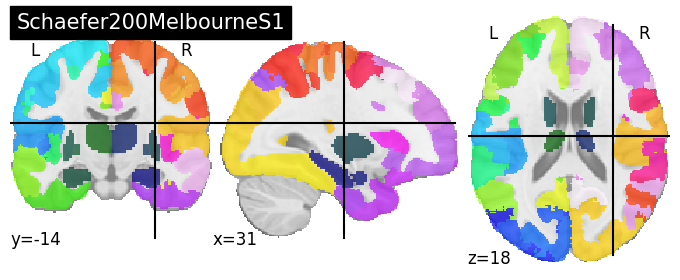

Parcellation: HCPex
INFO | 11/06/24 13:09:18 | nispace: Loading parcellation: HCPex (n: 426, space: mni152, res: 1mm)
Type: <class 'nibabel.nifti1.Nifti1Image'>
Space: MNI152
First 5 labels: ['1_LH_CX_V1', '2_LH_CX_V2', '3_LH_CX_V3', '4_LH_CX_V4', '5_LH_CX_IPS1']


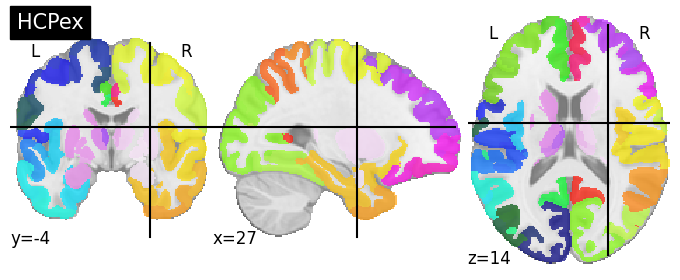

Parcellation: Destrieux
INFO | 11/06/24 13:09:21 | nispace: Loading parcellation: Destrieux (n: 148, space: fsaverage, res: 10k)
Type: <class 'tuple'>
Space: fsaverage
First 5 labels: ['1_LH_CX_G_and_S_frontomargin', '2_LH_CX_G_and_S_occipital_inf', '3_LH_CX_G_and_S_paracentral', '4_LH_CX_G_and_S_subcentral', '5_LH_CX_G_and_S_transv_frontopol']
INFO | 11/06/24 13:09:21 | nispace: Loading FSaverage pial template in 10k resolution.


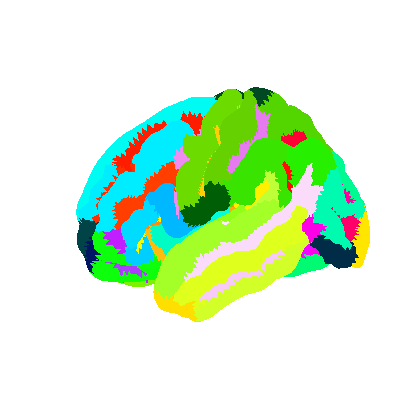

Parcellation: DesikanKilliany
INFO | 11/06/24 13:09:22 | nispace: Loading parcellation: DesikanKilliany (n: 68, space: fsaverage, res: 10k)
Type: <class 'tuple'>
Space: fsaverage
First 5 labels: ['1_LH_CX_bankssts', '2_LH_CX_caudalanteriorcingulate', '3_LH_CX_caudalmiddlefrontal', '4_LH_CX_cuneus', '5_LH_CX_entorhinal']
INFO | 11/06/24 13:09:22 | nispace: Loading FSaverage pial template in 10k resolution.


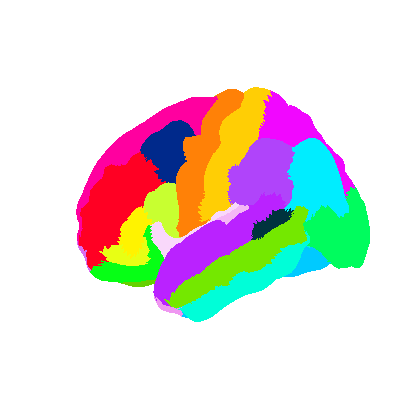

In [50]:
from nispace.datasets import fetch_parcellation
# for plotting
from nispace.datasets import fetch_template
from nilearn.plotting import plot_roi, plot_surf_roi
import matplotlib.pyplot as plt

# Currently available parcellations: Schaefer200MelbourneS1, HCPex, Destrieux, DesikanKilliany
for parc_name in ["Schaefer200MelbourneS1", "HCPex", "Destrieux", "DesikanKilliany"]:
    print("Parcellation:", parc_name)
    parc, labels, space = fetch_parcellation(
        parc_name, 
        return_space=True, 
        return_loaded=True
    )
    print("Type:", type(parc))
    print("Space:", space)
    print("First 5 labels:", labels[:5])
    
    # volumetric
    if space == "MNI152":
        plot_roi(parc, title=parc_name)
    # surface -> plot only left hemisphere
    else:
        plot_surf_roi(fetch_template("fsagerage")[0], roi_map=parc[0].agg_data())
    plt.show()

## Fetch example datasets

We include a few example datasets for evaluation and exploration purposes. Available:
- `"happy"` (CAVE: DUMMY DATA): n = 100 fake subjects in two groups. The first 50 are "happy" subjects (sub-001H - sub-050H), generated from CB1 and MU-opioid receptor PET maps. The second half are "neutral"/control subjects, each generated from a mixture of other PET maps. For analyses, they can be treated as two independent groups or two scans of the same subject. 
- `"abide"`: fALFF resting-state fMRI data from the ABIDE-I dataset, fetched from nilearn and parcellated. When fetching this, you will receive an associated table with subject information
- `"enigma"`: ENIGMA cortical thickness case-control results. Valued are Cohen's d per parcel.

In [88]:
from nispace.datasets import fetch_example

print("Happy data")
tab_example = fetch_example("happy")
display(tab_example.head(5))

print("ABIDE data")
tab_example, info_example = fetch_example("abide")
display(tab_example.head(5))
display(info_example.head(5))

print("ENIGMA data")
tab_example = fetch_example("enigma")
display(tab_example)



Happy data
INFO | 11/06/24 15:07:04 | nispace: Loading example dataset: happy
INFO | 11/06/24 15:07:04 | nispace: The happy dataset was parcellated using the Schaefer200MelbourneS1 parcellation.


,1_RH_SC_HIP,2_RH_SC_AMY,3_RH_SC_pTHA,4_RH_SC_aTHA,5_RH_SC_NAc,6_RH_SC_GP,7_RH_SC_PUT,8_RH_SC_CAU,9_LH_SC_HIP,10_LH_SC_AMY,...,207_RH_CX_Default,208_RH_CX_Default,209_RH_CX_Default,210_RH_CX_Default,211_RH_CX_Default,212_RH_CX_Default,213_RH_CX_Default,214_RH_CX_Default,215_RH_CX_Default,216_RH_CX_Default
sub-001H,-1.169317,0.659730,-0.252428,0.255775,3.063407,0.842101,2.105580,0.379213,-1.107364,0.763812,...,1.632188,1.680253,-0.108135,0.835279,0.374343,1.212071,0.516214,-1.110187,0.507818,0.624656
sub-002H,-1.029378,0.392960,-0.582311,-0.260871,2.333218,0.771998,1.764294,0.076125,-1.002971,0.496378,...,1.362518,1.368511,-0.195958,0.699824,0.302250,1.018583,0.404959,-0.928149,0.488933,0.612408
sub-003H,-0.672798,0.300029,-0.608585,-0.421008,1.652008,0.863853,1.381140,-0.103050,-0.670375,0.380154,...,1.079933,1.071393,-0.133740,0.580090,0.218293,0.761107,0.272294,-0.792569,0.310759,0.448372
sub-004H,-0.951254,0.718369,-0.455249,-0.038087,2.804853,1.107959,2.041347,0.161057,-0.909267,0.831812,...,1.579725,1.626022,-0.072021,0.810506,0.306932,1.091319,0.407535,-1.140142,0.398552,0.560564
sub-005H,-0.632732,0.570631,-0.599694,-0.343751,2.078618,1.213394,1.676500,-0.086425,-0.622002,0.666470,...,1.309854,1.330070,-0.049182,0.698252,0.225770,0.850557,0.275478,-1.009911,0.252231,0.435433


ABIDE data
INFO | 11/06/24 15:07:04 | nispace: Loading example dataset: abide
INFO | 11/06/24 15:07:04 | nispace: The abide dataset was parcellated using the Schaefer200MelbourneS1 parcellation.
INFO | 11/06/24 15:07:04 | nispace: Returning parcellated and associated subject data.


,1_RH_SC_HIP,2_RH_SC_AMY,3_RH_SC_pTHA,4_RH_SC_aTHA,5_RH_SC_NAc,6_RH_SC_GP,7_RH_SC_PUT,8_RH_SC_CAU,9_LH_SC_HIP,10_LH_SC_AMY,...,207_RH_CX_Default,208_RH_CX_Default,209_RH_CX_Default,210_RH_CX_Default,211_RH_CX_Default,212_RH_CX_Default,213_RH_CX_Default,214_RH_CX_Default,215_RH_CX_Default,216_RH_CX_Default
subject,,,,,,,,,,,,,,,,,,,,,
50003,0.550379,0.556799,0.558175,0.565839,0.553342,0.519940,0.538905,0.553295,0.545913,0.554257,...,0.511879,0.546551,0.572870,0.489960,0.481450,0.548910,0.553655,0.630450,0.624178,0.629993
50004,0.492533,0.488670,0.497226,0.506997,0.523376,0.498707,0.508254,0.535091,0.502559,0.493528,...,0.499219,0.514022,0.495265,0.535245,0.531300,0.530919,0.544821,0.531825,0.549992,0.583247
50005,0.510875,0.521592,0.522103,0.541097,0.559628,0.521452,0.541922,0.568454,0.529922,0.523470,...,0.539904,0.570698,0.539725,0.570238,0.521150,0.535021,0.549574,0.590597,0.604462,0.599347
50006,0.528309,0.517852,0.529154,0.524831,0.531129,0.517577,0.520542,0.530846,0.522528,0.523406,...,0.553780,0.543042,0.518454,0.561790,0.522045,0.552814,0.528958,0.580796,0.581530,0.590443
50007,0.552136,0.558819,0.555877,0.571004,0.583195,0.536471,0.572627,0.581086,0.541815,0.538237,...,0.584967,0.598638,0.561605,0.603095,0.533502,0.589898,0.550674,0.575307,0.609521,0.621164


,subject,site,site_num,dx,dx_num,dsm_iv_tr,age,sex,sex_num,qc_rater_1,qc_func_rater_2,qc_func_rater_3,adi_r_social_total_a,adi_r_verbal_total_bv,adi_rrb_total_c,ados_total,srs_raw_total,scq_total,aq_total
0,50003,PITT,9,ASD,1,1.0,24.45,M,1,OK,OK,OK,27.0,22.0,5.0,13.0,NaN,NaN,NaN
1,50004,PITT,9,ASD,1,1.0,19.09,M,1,OK,OK,OK,19.0,12.0,5.0,18.0,NaN,NaN,NaN
2,50005,PITT,9,ASD,1,1.0,13.73,F,2,OK,maybe,OK,23.0,19.0,3.0,12.0,NaN,NaN,NaN
3,50006,PITT,9,ASD,1,1.0,13.37,M,1,OK,maybe,OK,13.0,10.0,4.0,12.0,NaN,NaN,NaN
4,50007,PITT,9,ASD,1,1.0,17.78,M,1,OK,maybe,OK,21.0,14.0,9.0,17.0,NaN,NaN,NaN


ENIGMA data
INFO | 11/06/24 15:07:04 | nispace: Loading example dataset: enigma
INFO | 11/06/24 15:07:04 | nispace: The enigma dataset was parcellated using the DesikanKilliany parcellation.


,L_bankssts,L_caudalanteriorcingulate,L_caudalmiddlefrontal,L_cuneus,L_entorhinal,L_fusiform,L_inferiorparietal,L_inferiortemporal,L_isthmuscingulate,L_lateraloccipital,...,R_rostralanteriorcingulate,R_rostralmiddlefrontal,R_superiorfrontal,R_superiorparietal,R_superiortemporal,R_supramarginal,R_frontalpole,R_temporalpole,R_transversetemporal,R_insula
MDD,-0.058,-0.042,-0.014,0.047,-0.041,-0.117,-0.063,-0.049,-0.104,-0.023,...,-0.098,-0.038,-0.078,0.032,-0.031,-0.053,-0.062,0.013,-0.051,-0.115
PTSD,-0.100,-0.100,-0.120,-0.070,0.050,-0.060,-0.140,-0.070,-0.020,-0.150,...,0.010,-0.100,-0.120,-0.120,-0.140,-0.150,-0.100,-0.020,-0.050,-0.110
AN,-0.738,-0.065,-0.760,-0.663,0.060,-0.538,-0.895,-0.537,-0.620,-0.747,...,-0.003,-0.507,-0.722,-0.925,-0.522,-0.756,-0.332,-0.055,-0.258,-0.339
ADHD,0.000,-0.040,-0.050,0.020,-0.080,-0.100,0.010,-0.030,0.030,0.030,...,-0.010,0.000,0.000,0.010,0.000,-0.020,0.010,-0.120,0.010,-0.050
ASD,0.000,0.020,0.050,0.060,-0.150,NaN,0.010,-0.050,0.020,-0.010,...,0.090,0.220,0.200,-0.040,-0.050,-0.080,0.090,-0.150,-0.130,-0.100
OCD,-0.060,0.003,-0.090,-0.042,-0.062,-0.109,-0.140,-0.087,-0.068,-0.074,...,0.005,-0.091,-0.038,-0.047,0.014,0.003,0.021,0.015,-0.024,-0.065
BD,-0.207,-0.095,-0.266,-0.056,-0.036,-0.288,-0.265,-0.250,-0.132,-0.156,...,-0.087,-0.264,-0.256,-0.158,-0.194,-0.184,-0.102,-0.059,-0.109,-0.168
SCZ,-0.352,-0.119,-0.363,-0.203,-0.203,-0.491,-0.362,-0.449,-0.309,-0.331,...,-0.120,-0.313,-0.397,-0.219,-0.438,-0.386,-0.207,-0.236,-0.262,-0.406
22q11.2,-0.030,-0.210,0.510,0.520,0.160,0.190,0.250,0.280,0.300,0.220,...,0.160,0.800,0.530,0.300,-0.320,0.710,0.140,0.010,0.060,0.630
Epilepsy - all,-0.092,0.039,-0.319,-0.157,-0.264,-0.187,-0.197,-0.085,-0.049,-0.190,...,0.093,-0.197,-0.269,-0.313,-0.123,-0.223,-0.109,-0.181,-0.182,-0.022
